In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def prob_buffer(n0, L, M, tmax=6000, dt=1.0, nmax=100):
    """
        input
            n0, stato iniziale del buffer
            L,  MTBF macchina #1 [min]
            M, MTBF macchina #3 [min]
            tmax: tempo massimo del calcolo [min] (default: 100 h)
            dt: intervallo temporale per il calcolo [min] (default: 1 min)
            nmax: stato massimo del buffer (default: 100)
        output:
            p: matrice delle probabilità
               p(i,j) è la probabilità di essere nello stato i-esimo
               al tempo j*dt
            q: vettore delle probabilità di interruzione dovuta
               ad esaurimento del buffer e concomitante rottura della
               macchina a valle
               q(j) è la probabilità di interruzione al tempo j*dt
               
        Nota: In python, gli indici di matrici/vettori partono da 0
    """
    
    tmax, dt = np.float(tmax), np.float(dt)
    
    Ndt = np.int(tmax/dt) # numero intervalli temporali
    
    p = np.zeros((nmax+1, Ndt+1), dtype=np.float64)
    q = np.zeros(Ndt+1, dtype=np.float64)
    
    p[n0, 0] = 1 #si parte con il buffer nello stato n0
    
    Ldt, Mdt, oLMdt  = L*dt, M*dt, 1.0-L*dt-M*dt

    for i in range(Ndt):

        p[nmax, i+1] = p[nmax, i]*oLMdt + p[nmax-1, i]*Mdt    

        for j in range(nmax-1, 0, -1):
            p[j, i+1] = p[j, i]*oLMdt + p[j+1, i]*Ldt + p[j-1, i]*Mdt

        p[0, i+1] = p[0, i]*oLMdt + p[1, i]*Ldt

        q[i+1] = p[0, i]*Ldt
        
    sim = (p, q, n0, L, M, tmax, dt, nmax)
        
    return sim


def make_plot(sim, stati, max_hrs_plot=None):
    """
        input:
            sim:   dati della simulazione, che devono essere stati 
                   precedentemente calcolati con chiamata a prob_buffer()
            stati: lista degli stati del buffer che si vuole plottare 
                   (-1 rappresenta la probabilità di interruzione a 
                   causa di esaurimento del buffer e rottura della 
                   macchina a monte del buffer)
            max_hrs_plot: estremo destro dell'asse del tempi, espresso
                   in ore (default: plotta fino a tmax)
    """
    
    p, q, n0, L, M, tmax, dt, nmax = sim
    if max_hrs_plot is None:
        max_hrs_plot = tmax/60.0
    else:
        max_hrs_plot = min(max_hrs_plot, tmax/60.0)
    Ndt_max = np.int(np.float(max_hrs_plot*60.0)/dt)
    t = np.asarray(range(Ndt_max+1))*dt/60.0
    for s in stati:
        if s==-1:
            plt.plot(t[0:Ndt_max], q[0:Ndt_max])
        elif s<=nmax:
            plt.plot(t[0:Ndt_max], p[s,0:Ndt_max])
    legend(stati)
    xlabel('t [h]')
    ylabel('p')

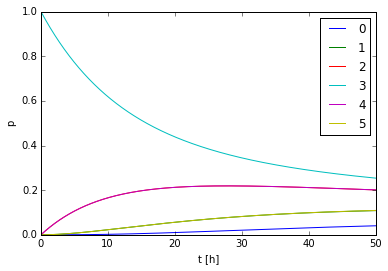

In [3]:
L = 1.0/(36*60.0) # MTBF macchina #1 [minuti]
M = 1.0/(36*60.0) # MTBF macchina #3 [minuti]

# caso 1
sim1 = prob_buffer(n0=3, L=L, M=M, tmax=6000, dt=1.0, nmax=100)

make_plot(sim1, stati=[0,1,2,3,4,5], max_hrs_plot=50)

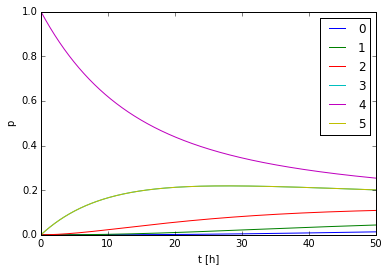

In [4]:
# caso 2
sim2 = prob_buffer(n0=4, L=L, M=M)

make_plot(sim2, stati=[0,1,2,3,4,5], max_hrs_plot=50)

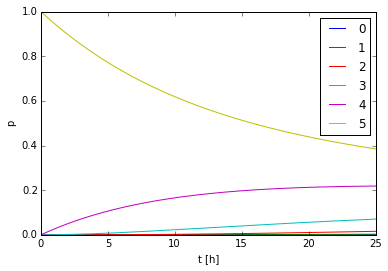

In [5]:
# caso 3
sim3 = prob_buffer(n0=5, L=L, M=M)

make_plot(sim3, stati=[0,1,2,3,4,5], max_hrs_plot=25)

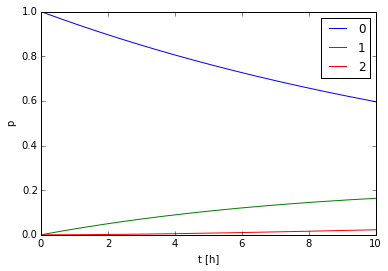

In [6]:
# caso 4, si parte senza buffer
sim4 = prob_buffer(n0=0, L=L, M=M, dt=.1, tmax=600)

make_plot(sim4, stati=[0,1,2])

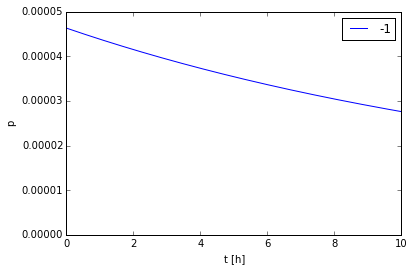

In [7]:
#plot solo della probabilità di esaurire il buffer
make_plot(sim4, stati=[-1], max_hrs_plot=10)